Research question

Can historical stock price data be used to accurately predict future price movements

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [ ]:
data = pd.read_csv("/content/data.csv")
data = data.rename(columns={'Close/Last': 'Close'})
print(data['Date'].head())
data['Date'] = pd.to_datetime(data['Date'], format="mixed")
data = data.set_index('Date')
data = data.dropna()
data['Volume'] = data['Volume'].astype(str).apply(lambda x: x.replace(',', '')).astype(int)
# Add additional features if needed (e.g., technical indicators)
data.isnull().sum()
data.sort_values('Date', inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.tail())


0    07/17/2023
1    07/14/2023
2    07/13/2023
3    07-12-2023
4    07-11-2023
Name: Date, dtype: object
  Company     Close     Volume      Open     High       Low
0    QCOM   $61.115   23673110    $61.94   $62.02    $60.82
1     AMD     $4.64   69380920     $4.38    $4.65     $4.37
2    TSLA   $7.9353  170465465   $8.0647   $8.182   $7.7453
3    AMZN  $15.2055   61176700  $15.3135  $15.317  $15.0935
4    META    $26.18   24697620    $26.75   $26.77    $26.12
      Company    Close     Volume      Open     High      Low
25155    QCOM  $123.40    6127180   $122.33  $124.46  $120.76
25156    TSLA  $290.38  131569600  $286.625  $292.23  $283.57
25157    META  $310.62   25323130   $307.54  $311.71  $304.71
25158    MSFT  $345.73   20363930  $345.678  $346.99  $342.20
25159    AAPL  $193.99   50520160   $191.90  $194.32  $191.81


Min stock price: $1.62
Max stock price: $99.99
Min trading volume: 1143952
Max trading volume: 1065209454


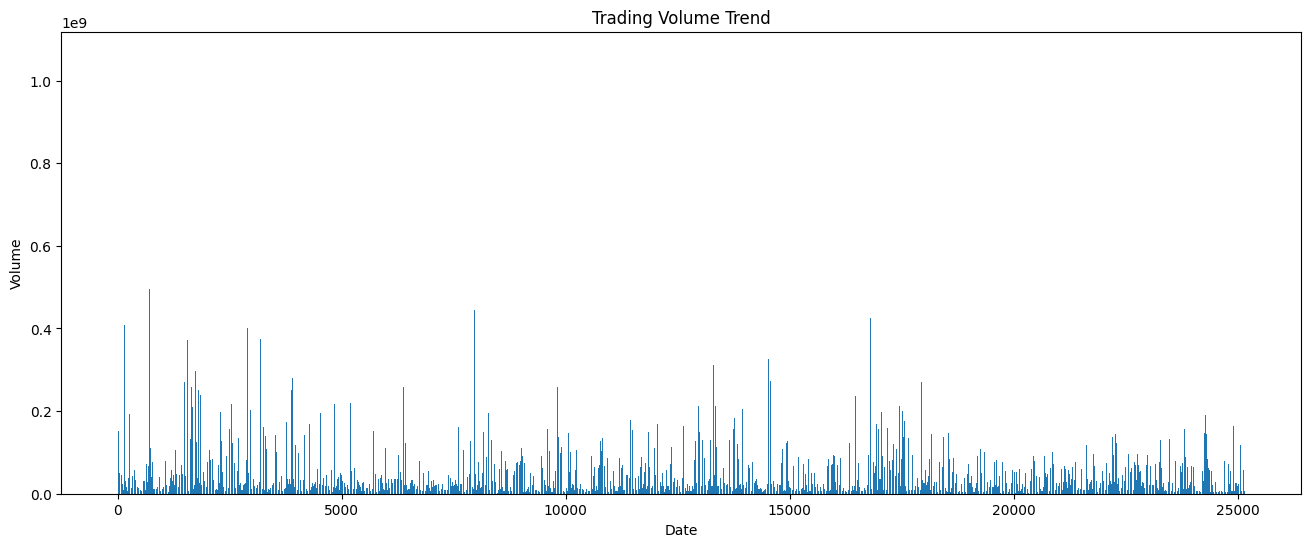

Volatility (standard deviation) of stock prices: 101.99


In [ ]:
# Analyze stock price distribution
print(f"Min stock price: {data['Close'].min()}")
print(f"Max stock price: {data['Close'].max()}")
#print(f"Mean stock price: {data['Close'].mean()}")

# Analyze trading volume distribution
print(f"Min trading volume: {data['Volume'].min()}")
print(f"Max trading volume: {data['Volume'].max()}")
#print(f"Mean trading volume: {data['Volume'].mean()}")



# Visualize trading volume trend
plt.figure(figsize=(16, 6))
plt.bar(data.index, data['Volume'])
plt.title('Trading Volume Trend')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()
# Calculate volatility using standard deviation
data['Close'] = data['Close'].str.replace('[^0-9.]', '', regex=True).astype(float)
volatility = data['Close'].std()
print(f"Volatility (standard deviation) of stock prices: {volatility:.2f}")




In [ ]:
# Prepare data
data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
data.dropna(inplace=True)
X = data[['Close', 'Volume']]
y = data['Target']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_accuracy = lr.score(X_test, y_test)
print("Logistic Regression:",lr_accuracy)




Logistic Regression: 0.5109300476947536


In [ ]:
X_test = X_test.iloc[:, :2]

# Predictions for Logistic Regression model
lr_pred = lr.predict(X_test)

# Metrics for Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_conf_matrix = confusion_matrix(y_test, lr_pred)

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"Precision: {lr_precision:.2f}")
print(f"Recall: {lr_recall:.2f}")
print(f"F1-score: {lr_f1:.2f}")


Logistic Regression Metrics:
Accuracy: 0.51
Precision: 0.51
Recall: 1.00
F1-score: 0.68


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Generate synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(rf_accuracy)


0.88


In [ ]:
# Metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1-score: {rf_f1:.2f}")





Random Forest Metrics:
Accuracy: 0.88
Precision: 0.91
Recall: 0.86
F1-score: 0.89


In [ ]:
# Train Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print(gb_accuracy)

0.9


In [ ]:
# Metrics for Gradient Boosting
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)
gb_f1 = f1_score(y_test, gb_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_pred)

print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1-score: {gb_f1:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.90
Precision: 0.95
Recall: 0.86
F1-score: 0.91


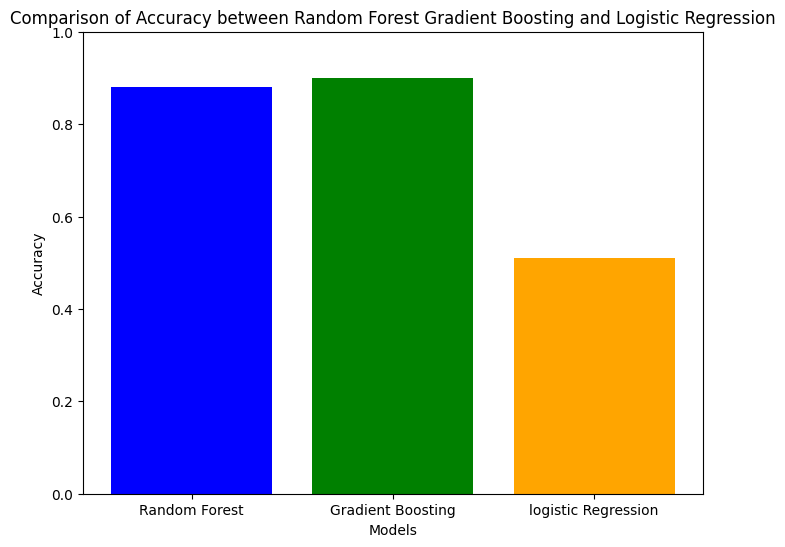

In [ ]:
# Plotting
plt.figure(figsize=(8, 6))
models = ['Random Forest', 'Gradient Boosting','logistic Regression']
accuracy_scores = [rf_accuracy, gb_accuracy, lr_accuracy ]
x_pos = np.arange(len(models))
plt.bar(x_pos, accuracy_scores, color=['blue', 'green','orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy between Random Forest Gradient Boosting and Logistic Regression')
plt.xticks(x_pos, models)
plt.ylim(0, 1)  # Set y-axis limit to range from 0 to 1
plt.show()

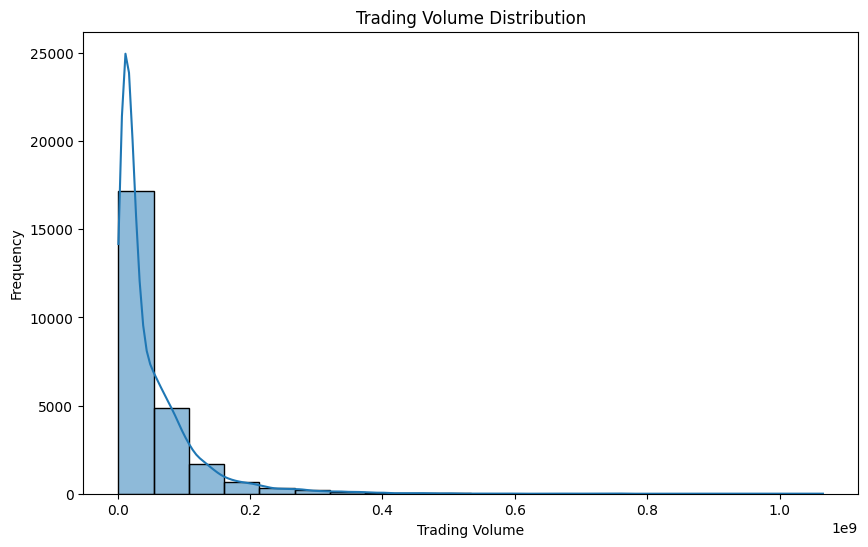

In [ ]:
# Trading volume distribution histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Volume'], bins=20, kde=True)
plt.title('Trading Volume Distribution')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()



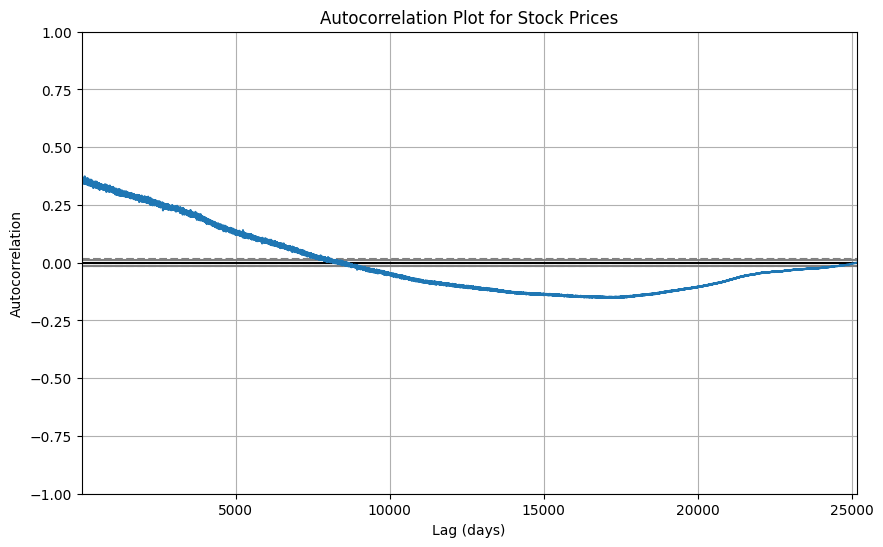

In [ ]:

# Autocorrelation plot for stock prices
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(data['Close'])
plt.title('Autocorrelation Plot for Stock Prices')
plt.xlabel('Lag (days)')
plt.ylabel('Autocorrelation')
plt.show()

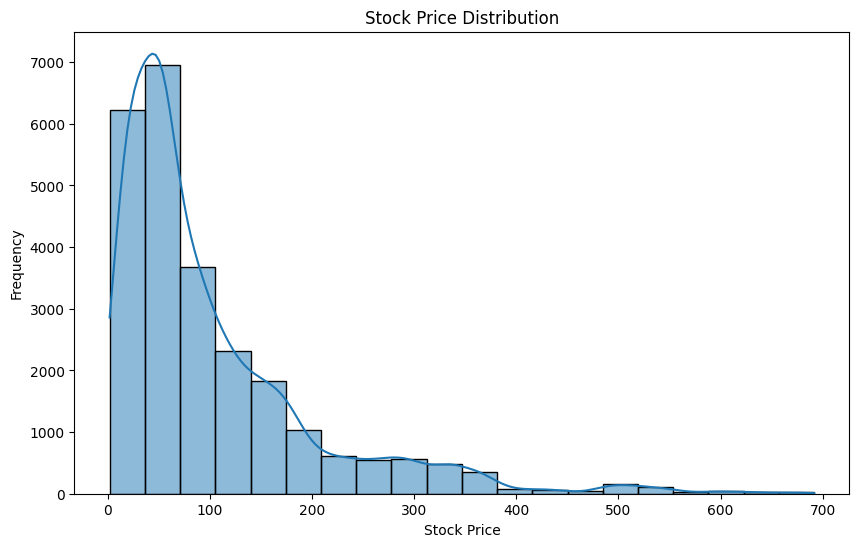

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=20, kde=True)
plt.title('Stock Price Distribution')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.show()

